# NOTEBOOK TO EXPLORE DIFFERENT MACHINE LEARNING MODELS

In [1]:
#import numerical and data manipulation libraries
import numpy as np
import pandas as pd

#import scikit-learn libraries for model building and evaluation
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

#import libraries for plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Setting general graphs appearance
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize']= (5,5)
plt.rcParams['font.size']= 15

For the exploration will use iris dataset available in scickit learn datasets

In [3]:
iris = datasets.load_iris()
print(iris)


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
data = pd.DataFrame(data = iris.data, columns= iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
target = pd.DataFrame(data=iris.target, columns=['species'])
data = pd.concat([data,target], axis=1)
data = data.sample(frac=1, random_state=1234) #shuffle the data to max randomness
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


splitting our data set - training and testing 
use the split 80/20 training/testing -> goal its using 80% for training and 20% for testing the model
in ocasions you need a portion for validation but this is only for complex datasets

In [6]:
Ntrain = int(0.8 * data.shape[0]) #80% for training
train = data.iloc[:Ntrain, :]
test = data.iloc[Ntrain:, :]

print(train.head(), train.shape)
print(test.head(), test.shape)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
91                 6.1               3.0                4.6               1.4   
63                 6.1               2.9                4.7               1.4   
103                6.3               2.9                5.6               1.8   
6                  4.6               3.4                1.4               0.3   
59                 5.2               2.7                3.9               1.4   

     species  
91         1  
63         1  
103        2  
6          0  
59         1   (120, 5)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
107                7.3               2.9                6.3               1.8   
115                6.4               3.2                5.3               2.3   
129                7.2               3.0                5.8               1.6   
65                 6.7               3.1                4.4               1.4   
12       

## Linear Regression

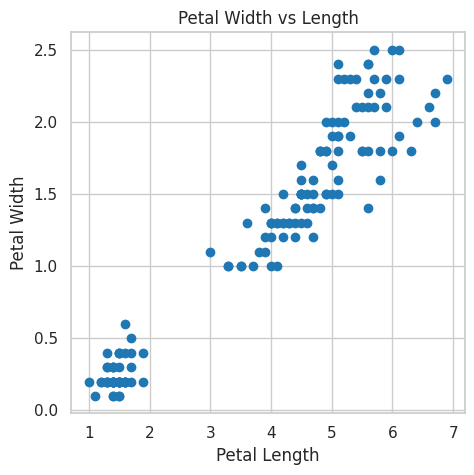

In [7]:
#slicing target columns
plength = data['petal length (cm)']
pwidth = data['petal width (cm)']

#Using Object Oritented Programming to create a figure and axis
f =  plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('Petal Width vs Length')
f.tight_layout()

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

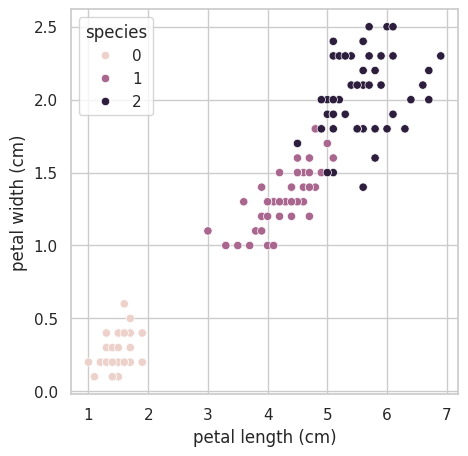

In [11]:
(
    data
    .pipe(
        lambda df: sns.scatterplot(
            data= df,
            x= 'petal length (cm)',
            y= 'petal width (cm)',
            hue= 'species'
        )
    )
)

We can observe that there is a linear relationship. We want to quantify that relationship.
We need to fit the model to   θ1∗x+θ0=y , the straight line equation.

In [8]:
#import a linear regression model
model_1 = linear_model.LinearRegression()

#fit the model
model_1.fit(
    pd.DataFrame(train.iloc[:, 2]), train.iloc[:, 3]
)

#print coefficients
print(f"Coef\n {model_1.coef_}")
print(f"\n\nIntercept or Bias\n {model_1.intercept_}")

Coef
 [0.41490802]


Intercept or Bias
 -0.357589314248546


so the straight line equation is:

0.41X + (-0.36) = Y

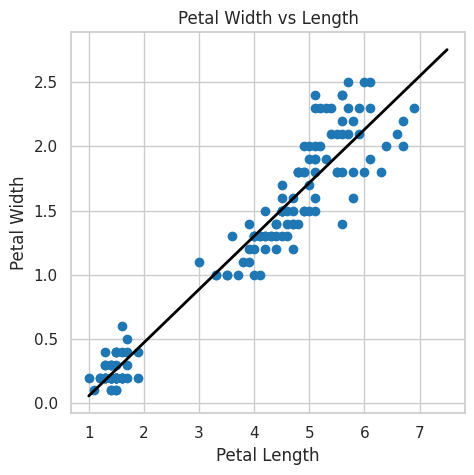

In [9]:
#slicing target columns
plength = data['petal length (cm)']
pwidth = data['petal width (cm)']

#setting the range
xvals = np.arange(plength.min(), plength.max()+1, 0.5)

#straight line equation
yvals = model_1.coef_[0]*xvals + model_1.intercept_

#plotting the results
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.scatter(plength, pwidth)
ax.plot(xvals, yvals, 'k', linewidth=2)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('Petal Width vs Length')
f.tight_layout()


This demostrate a good relationship. now lets evaluate performance by analysing the MSE and R2

In [10]:
ypredict = model_1.predict(pd.DataFrame(test.iloc[:, 2]))
print(ypredict)
print('MSE: %.2f' % mean_squared_error(pd.DataFrame(test.iloc[:, 3]), ypredict))

[2.25633119 1.84142317 2.04887718 1.46800596 0.22328191 0.26477271
 0.18179111 0.26477271 1.96589558 1.46800596 1.96589558 0.26477271
 0.22328191 1.63396916 1.59247836 1.67545997 1.21906115 1.26055195
 1.92440478 2.00738638 2.505276   0.30626351 2.00738638 0.30626351
 0.34775431 2.09036798 1.92440478 1.30204275 0.18179111 0.22328191]
MSE: 0.04
